In [148]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
amazon = pd.read_csv("/content/Amazon_Reviews.csv")

<ipython-input-107-b41dc6580865>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv("/content/Amazon_Reviews.csv")


In [126]:
amazon1 = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
amazon2 = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [108]:
amazon.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,NaN,NaN,tklit
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,NaN,NaN,Droi
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,NaN,NaN,Kacy
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",

In [109]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [110]:
data = amazon[["id","reviews.text","reviews.rating"]]

In [111]:
data.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [112]:
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,This product so far has not disappointed. My c...
freq,10966,1


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              34660 non-null  object 
 1   reviews.text    34659 non-null  object 
 2   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


In [114]:
data = data.dropna()

# Exploratory Data Analysis

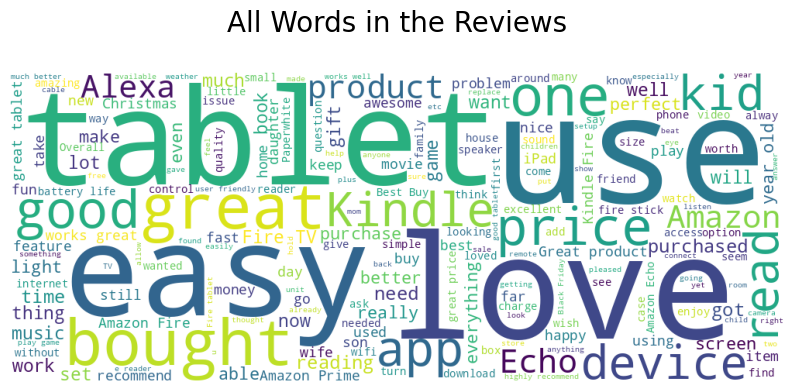

In [115]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [117]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [118]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1


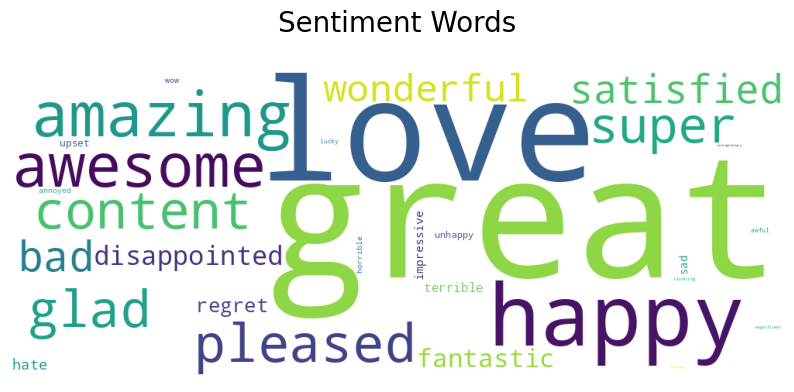

In [119]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

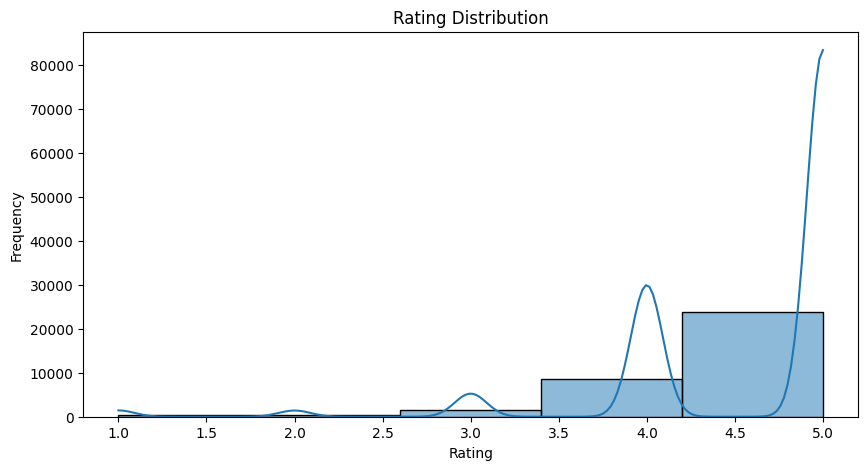

In [120]:
plt.figure(figsize=(10, 5))
sns.histplot(data['reviews.rating'], bins=5, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [121]:
data1 = data.groupby("id").mean().reset_index()

<ipython-input-121-76ca19166fe6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = data.groupby("id").mean().reset_index()


In [122]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

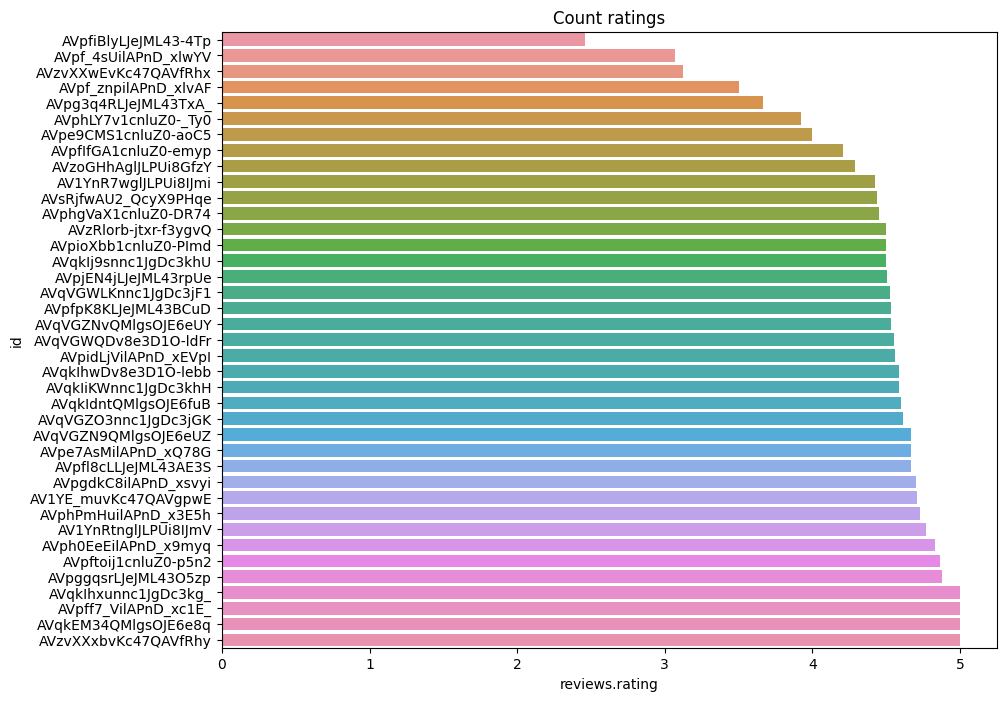

In [123]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

In [127]:
data2 = amazon1[["id","reviews.text","reviews.rating"]]
data3 = amazon2[["id","reviews.text","reviews.rating"]]

In [128]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [129]:
len(data2), len(data3)

(2787, 314)

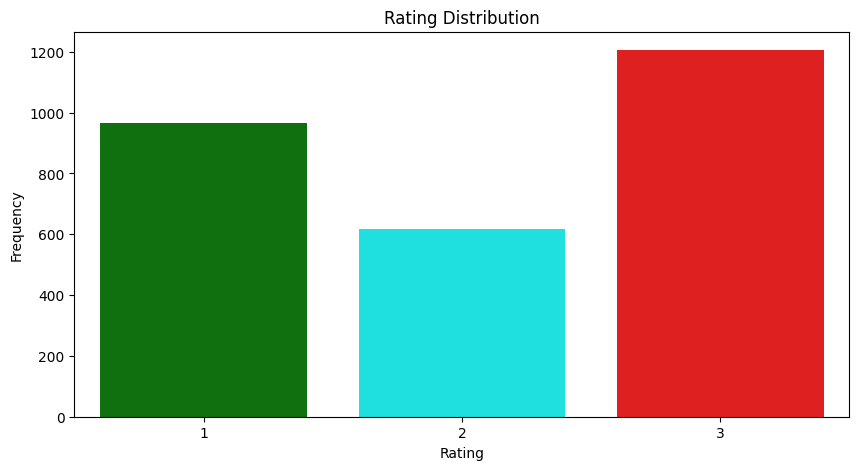

In [130]:
colors = ['green', 'aqua', 'red']

plt.figure(figsize=(10, 5))
sns.barplot(x=data2['reviews.rating'].value_counts().index, y=data2['reviews.rating'].value_counts(), palette=colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')


plt.show()

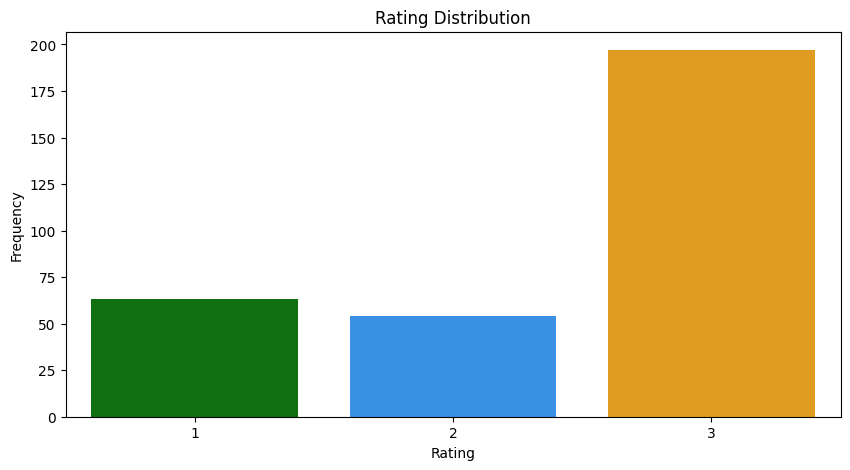

In [131]:
colors = ['green', 'dodgerblue', 'orange']
plt.figure(figsize=(10, 5))
sns.barplot(x=data3['reviews.rating'].value_counts().index, y=data3['reviews.rating'].value_counts(), palette=colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

In [132]:
frames = [data, data2, data3]
final = pd.concat(frames)

# Plot for count of rating

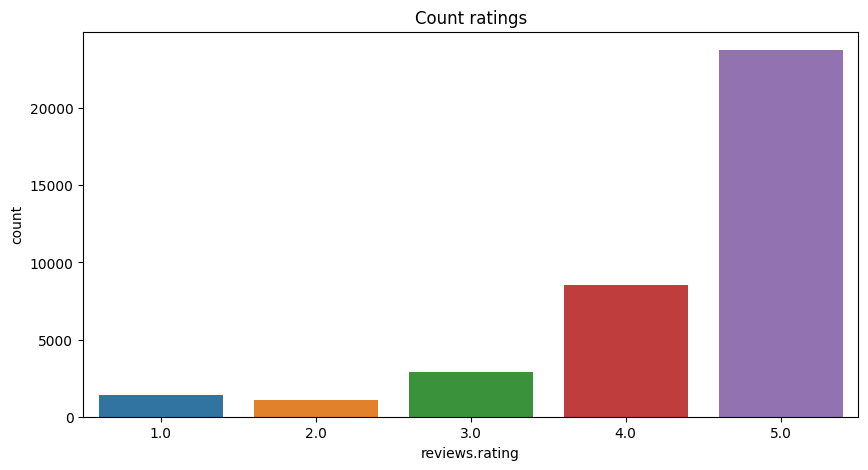

In [133]:
plt.figure(figsize=(10, 5))

sns.countplot(data=final, x='reviews.rating')
plt.title('Count ratings')
plt.show()

In [135]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


# Preprocessing Text

In [136]:
# Ensure 'reviews.text' is of type string
final["reviews.text"] = final["reviews.text"].astype(str)

# Lowercase all text
final["reviews.text"] = final["reviews.text"].str.lower()

# Tokenization of words
final['reviews.text'] = final.apply(lambda row: word_tokenize(row['reviews.text']), axis=1)

# Only alphanumerical values
final["reviews.text"] = final['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()])

# Lemmatizing words
lemmatizer = WordNetLemmatizer()
final['reviews.text'] = final['reviews.text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

# Removing stopwords
stop = set(stopwords.words('english'))
final['reviews.text'] = final['reviews.text'].apply(lambda x: [item for item in x if item not in stop])


#joining all tokens

In [137]:
final["reviews.text"] = final["reviews.text"].apply(lambda x: str(' '.join(x)))

In [138]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0


#sentimental analysis

In [139]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

final["sentiment"] = final["reviews.rating"].map(sentiment)

In [140]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,1
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,1


In [141]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1])

(5412, 32315)

# building tfidf matrix to train models

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=1)
text = vectorizer.fit_transform(final["reviews.text"])


# Model Selection

# Spliting the dataset into test and train

In [150]:
x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)

# Random Forests

In [154]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)



In [155]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9355950172276702
Train accuracy 0.9994698576189034


In [156]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1643
           1       0.94      0.99      0.96      9676

    accuracy                           0.94     11319
   macro avg       0.93      0.80      0.85     11319
weighted avg       0.93      0.94      0.93     11319



# 3 Labels


In [170]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

final["sentiment"] = final["reviews.rating"].map(sentiment)

In [171]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,2
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,2
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,2
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,2
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,2


In [172]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1]),len(final[final["sentiment"]==2])

(2510, 2902, 32315)

In [173]:
# building tfidf matrix to train models
vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(final["reviews.text"])

In [174]:
x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)

# Logistic Regression

In [175]:
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.8991960420531849
Train accuracy 0.9228264162375038


In [177]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1765
           1       0.82      0.32      0.46      2004
           2       0.93      0.99      0.96     22639

    accuracy                           0.92     26408
   macro avg       0.87      0.67      0.73     26408
weighted avg       0.92      0.92      0.91     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       745
           1       0.64      0.23      0.34       898
           2       0.91      0.99      0.95      9676

    accuracy                           0.90     11319
   macro avg       0.77      0.59      0.64     11319
weighted avg       0.88      0.90      0.88     11319



# Random Forest

In [178]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)



In [179]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9245516388373531
Train accuracy 0.9988639806119358


In [180]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1765
           1       1.00      0.99      0.99      2004
           2       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       745
           1       0.87      0.43      0.57       898
           2       0.93      0.99      0.96      9676

    accuracy                           0.92     11319
   macro avg       0.88      0.68      0.75     11319
weighted avg       0.92      0.92      0.91     11319



# Performing RNN



In [181]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical

In [182]:
t = Tokenizer()

In [183]:
t.fit_on_texts(final["reviews.text"])

In [184]:
max_length = max([len(s.split()) for s in final["reviews.text"] ])
max_legth=max_length #the max length is aroun 1000 character. I would keep it shorter.

In [185]:
vocab_size = len(t.word_index)+1

In [186]:
X_train, X_test, y_train, y_test = train_test_split(final["reviews.text"], final["sentiment"], test_size=0.25)


In [187]:
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)

In [188]:
X_train = pad_sequences(X_train, maxlen=max_length, padding = "post",truncating = "post")
X_test = pad_sequences(X_test, maxlen=max_length, padding = "post", truncating = "post")

In [189]:
X_train = X_train[0:28290]
y_train = y_train[0:28290]
X_test = X_test[0:9430]
y_test = y_test[0:9430]
len(y_test),len(X_test),len(X_train),len(y_train)

(9430, 9430, 28290, 28290)

# Converting  y_train and y_test to categorical

In [190]:
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [191]:
embedding_dim = 200
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(units = 32))
model.add(Dense(3,activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
885/885 [==============================] - 639s 718ms/step - loss: 0.3153 - accuracy: 0.8548
Epoch 2/3
885/885 [==============================] - 640s 723ms/step - loss: 0.3106 - accuracy: 0.8558
Epoch 3/3
885/885 [==============================] - 616s 696ms/step - loss: 0.3106 - accuracy: 0.8558


In [192]:
model.evaluate(x=X_test, y=y_test, batch_size=10)


943/943 [==============================] - 85s 89ms/step - loss: 0.3060 - accuracy: 0.8586


[0.30596724152565, 0.8586426377296448]